In [1]:
! pip install networkx
! pip install plotly
! pip install colorlover

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# NetworkX

In [2]:
import networkx as nx

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("/resources/data/tweets.zip", sep='\t', compression='zip')

In [25]:
print("Num of rows:", df.shape[0])

Num of rows: 3437690


In [26]:
df.head()

,date,user,tweet
0,2009-06-01 21:43:59,burtonator,No Post Title
1,2009-06-01 21:47:23,burtonator,No Post Title
2,2009-06-02 01:15:44,burtonator,No Post Title
3,2009-06-02 05:17:52,burtonator,No Post Title
4,2009-06-02 23:58:25,burtonator,No Post Title


## Finding most common hash tags

In [27]:
from collections import Counter

In [28]:
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

In [29]:
hashTagsCounter.most_common(300)

[('#iranelection', 26853),
 ('#followfriday', 16400),
 ('#jobs', 13322),
 ('#iremember', 11057),
 ('#spymaster', 10587),
 ('#ff', 10446),
 ('#squarespace', 9198),
 ('#tcot', 7691),
 ('#fb', 6107),
 ('#cnnfail', 4451),
 ('#11thcommandment', 3429),
 ('#jtv', 3317),
 ('#140mafia', 3144),
 ('#iran', 2935),
 ('#', 2895),
 ('#news', 2837),
 ('#quote', 2750),
 ('#vampirebite', 2634),
 ('#1', 2587),
 ('#bsb', 2433),
 ('#tweetmyjobs', 2086),
 ('#iphone', 1697),
 ('#lastfm', 1599),
 ('#mp2', 1589),
 ('#niley', 1528),
 ('#music', 1489),
 ('#p2', 1439),
 ('#follow', 1390),
 ('#pawpawty', 1305),
 ('#hhrs', 1256),
 ('#fail', 1246),
 ('#twitter', 1216),
 ('#tlot', 1214),
 ('#facebook', 1177),
 ('#sgp', 1151),
 ('#mashchat', 1143),
 ('#tinychat', 1111),
 ('#2', 1107),
 ('#digg', 1102),
 ('#gop', 1009),
 ('#phish', 1001),
 ('#mlb', 962),
 ('#travel', 932),
 ('#bonnaroo', 887),
 ('#twitpocalypse', 879),
 ('#iranelections', 857),
 ('#rt', 856),
 ('#zensursula', 811),
 ('#jamlegend', 790),
 ('#quotes', 75

In [30]:
Tag = df[df["tweet"].str.lower().str.contains("#funny", na=False)].copy()

In [31]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [32]:
addMentionedColumn(Tag)

In [33]:
Tag.head(10)

,date,user,tweet,mentioned
9738,2009-06-11 17:12:19,bigmiggy24,Just added myself to the http://wefollow.com t...,[]
31459,2009-06-11 17:46:28,12c4,RT @brigwyn Another winner from @maryvarn http...,"[brigwyn, maryvarn]"
33640,2009-06-11 17:49:23,oubath,Just added myself to the http://wefollow.com t...,[]
58026,2009-06-11 18:23:58,biodome007,@bri_tri Take the day off for your birthday & ...,[bri_tri]
82013,2009-06-11 19:07:02,timodell,Hey look at this! Obamanut's teleprompter has ...,[]
85042,2009-06-11 19:12:38,eddruckman,RT @mnrmgHILARIOUS!! Deven Green - Welcome to ...,[mnrmghilarious!!]
97619,2009-06-11 19:32:18,mimi_yj,"#funnysonglyric ""throw some d's on that bxtchh...",[]
123511,2009-06-11 20:15:22,the_deliverer,David Letterman Clears Things Up With Gov. Sar...,[]
134910,2009-06-11 20:37:04,jessytroy,#funny Look How Bing (Microsoft) Searches http...,[]
183304,2009-06-11 21:55:57,andywendt,RT @Lesneedsvalium: RT @ConNews: Dilbert sums ...,"[lesneedsvalium, connews]"


In [34]:
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, {'numberMentions': 1})
    
    return g

In [35]:
mentionGraph = mentionGraph(Tag)

In [36]:
print("# nodes:", len(mentionGraph.nodes()))
print("# edges:", len(mentionGraph.edges()))

# nodes: 176
# edges: 134


# Visualize Mention Graph

In [37]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning:

Matplotlib is building the font cache using fc-list. This may take a moment.

/usr/local/lib/python3.4/dist-packages/matplotlib/font_manager.py:273: UserWarning:

Matplotlib is building the font cache using fc-list. This may take a moment.



### Generate random positions for nodes and store them at property "pos"

In [38]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph,"pos", posDict)

In [39]:
addRandomPositions(mentionGraph)

In [40]:
nx.get_node_attributes(mentionGraph, 'pos')['brigwyn']

(5.605611210462853, 5.979441707979158)

### Visualize using Plot.ly scatter plots

In [41]:
def plotNetwork(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=1 ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.node[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='marker', 
                marker=dict(
                    color="#888", 
                    size=10,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [42]:
plotNetwork(mentionGraph)

### Visualize using node size and edge width

In [43]:
def plotNetworkSize(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.node[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='marker', 
                marker=dict(
                    color="#888", 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [44]:
plotNetworkSize(mentionGraph)

## Using *Colorlover* for colors

In [45]:
import colorlover as cl
from IPython.display import HTML

In [46]:
HTML(cl.to_html( cl.scales['9'] ))

In [47]:
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['PuRd']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))

## Adding color and text based on centrality

In [48]:
def plotNetworkSizeColor(graph):
    closenessCentr = nx.closeness_centrality(mentionGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.node[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s\nCloseness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='marker', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [49]:
plotNetworkSizeColor(mentionGraph)

## Using NetworkX layouts

In [50]:
def applyLayout(graph, layoutFunc):
    posDict = layoutFunc(graph) 
    nx.set_node_attributes(graph, "pos", posDict)

### Spring layout

In [51]:
mentionGraphSpring = mentionGraph.copy()
applyLayout(mentionGraphSpring, nx.spring_layout)
plotNetworkSizeColor(mentionGraphSpring)

### Random layout

In [52]:
mentionGraphRandom = mentionGraph.copy()
applyLayout(mentionGraphRandom, nx.random_layout)
plotNetworkSizeColor(mentionGraphRandom)

### Circular layout

In [53]:
mentionGraphCircular = mentionGraph.copy()
applyLayout(mentionGraphCircular, nx.circular_layout)
plotNetworkSizeColor(mentionGraphCircular)

### Spectral layout

In [54]:
mentionGraphSpectral = mentionGraph.copy()
applyLayout(mentionGraphSpectral, nx.spectral_layout)
plotNetworkSizeColor(mentionGraphSpectral)

In [150]:
degrees = nx.degree(mentionGraph)
fdegrees = list(degrees.values())
import operator
sorted_f = sorted(degrees.items(), key=operator.itemgetter(1))
sorted_f.reverse()

In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


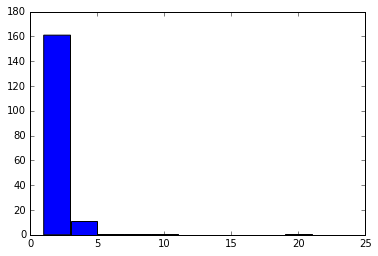

In [58]:
plt.hist(fdegrees)
plt.show()

In [106]:
l = []
for (node1, node2) in mentionGraph.edges():
    edgeWidth = mentionGraph[node1][node2]['numberMentions']
    l.append([node1, node2, edgeWidth])

In [107]:
l

[['clutterdiet', 'rogercparker', 1],
 ['clutterdiet', 'omarg', 1],
 ['clutterdiet', 'conniereece', 1],
 ['ca_rose', 'dpbkmb', 1],
 ['ca_rose', 'sargedunn1', 1],
 ['taylorleon', 'kaifischer', 1],
 ['mkcol', 'danielreardon', 1],
 ['magdalynduffs', 'diptnyc', 1],
 ['d3r)', 'subzane', 1],
 ['kwsanders', 'sargedunn1', 1],
 ['mostie', 'princes_lea', 1],
 ['paul_steele', 'sargedunn1', 1],
 ['clergywomen', 'johnnya99', 1],
 ['surajkala', 'nayanmedhi', 4],
 ['mccore', 'sargedunn1', 1],
 ['seosem', 'cchcreative', 1],
 ['coolpicsi', 'jasonmcsteen', 1],
 ['shivaranjan', 'brainstuck', 1],
 ['shivaranjan', 'theanand', 2],
 ['cobaltcow', '_1981_', 1],
 ['mnrmg', '12c4', 1],
 ['sargedunn1', 'dpbkmb', 5],
 ['sargedunn1', 'redrobinrockn', 2],
 ['sargedunn1', 'tracyewilli', 1],
 ['sargedunn1', 'lifequips', 2],
 ['sargedunn1', '1sweetwhirl', 1],
 ['sargedunn1', 'queeninmycity', 2],
 ['sargedunn1', 'shinyhappyhead', 3],
 ['sargedunn1', 'whitsundays', 1],
 ['sargedunn1', 'oub12', 1],
 ['sargedunn1', 'bighit

In [115]:
from operator import itemgetter
sorted_l = sorted(l, key=itemgetter(2), reverse=True)
sorted_l[0:5]

[['sargedunn1', 'gunnyd55', 8],
 ['sargedunn1', 'dpbkmb', 5],
 ['misbhaving', 'jarrodwalsh', 5],
 ['misbhaving', '_dylan_lewis_', 5],
 ['surajkala', 'nayanmedhi', 4]]

In [194]:
edgeWidth = [int(i[2]) for i in sorted_l]

In [197]:
edgeWidth_max = max(edgeWidth)
edgeWidth_min = min(edgeWidth)

In [201]:
def plotNetworkEdgeColor(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth-edgeWidth_min)/(edgeWidth_max-edgeWidth_min))        
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=1 , color=purd300[edgeColor]))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.node[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='marker', 
                marker=dict(
                    color="#888", 
                    size=10,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [202]:
plotNetworkEdgeColor(mentionGraph)

In [203]:
def plotByEdgeColor(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth-edgeWidth_min)/(edgeWidth_max-edgeWidth_min))        
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=edgeWidth , color=purd300[edgeColor]))
        scatters.append(s)


    for node in graph.nodes():
        xPos, yPos = graph.node[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='marker', 
                marker=dict(
                    color="#888", 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [204]:
plotByEdgeColor(mentionGraph)

In [63]:
tweets = Tag['tweet'].str.cat(sep=' ')

In [70]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [179]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop.add('www')
stop.add('http')
stop.add('com')
stop.add('rt')
stop.add('twitter')

In [180]:
import re
funnytweetWords = [word.strip(""" ,.:'\";""").lower() for word in re.findall(r'\w+', tweets) if word.lower() not in stop and len(word)>2]
funnytweetWordsCounter = Counter(funnytweetWords)

In [181]:
funnytweetWordsCounter.most_common(50)

[('funny', 289),
 ('added', 140),
 ('wefollow', 140),
 ('directory', 140),
 ('bit', 66),
 ('funnys', 42),
 ('sargedunn1', 34),
 ('lol', 25),
 ('video', 16),
 ('tinyurl', 16),
 ('funnywordsforgenitalia', 11),
 ('got', 11),
 ('music', 11),
 ('creative', 11),
 ('_dylan_lewis_', 11),
 ('humor', 10),
 ('one', 10),
 ('love', 9),
 ('cli', 9),
 ('dsud6g', 9),
 ('advertising', 9),
 ('new', 9),
 ('twitpic', 9),
 ('via', 9),
 ('tcot', 9),
 ('sexy', 9),
 ('blogger', 9),
 ('cool', 9),
 ('pic', 9),
 ('like', 9),
 ('examples', 9),
 ('funnygirl', 8),
 ('best', 8),
 ('comedy', 8),
 ('get', 8),
 ('jason_pollock', 8),
 ('watch', 7),
 ('funnyguy', 7),
 ('cute', 7),
 ('wtf', 7),
 ('funnyfriday', 7),
 ('harxf', 7),
 ('good', 7),
 ('time', 7),
 ('photos', 6),
 ('jarrodwalsh', 6),
 ('dog', 6),
 ('really', 6),
 ('smart', 6),
 ('hilarious', 6)]

In [71]:
def mostCommonWordsForUser(user):
    userdf = df.loc[df['user'] == user]
    usertweets = userdf['tweet'].str.cat(sep=' ')
    usertweetWords = [word.strip(""" ,.:'\";""").lower() for word in re.findall(r'\w+', usertweets) if word.lower() not in stop and len(word)>2]
    usertweetWordsCounter = Counter(funnytweetWords)
    top3 = usertweetWordsCounter.most_common(3)
    topwords = [i[0] for i in top3]

In [205]:
def plotNetworkEdgeColorWithHover(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth-edgeWidth_min)/(edgeWidth_max-edgeWidth_min))        
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=1 , color=purd300[edgeColor]))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.node[node]['pos']
        userdf = Tag.loc[Tag['user'] == node]
        usertweets = userdf['tweet'].str.cat(sep=' ')
        numberoftweets = len(userdf)
        usertweetWords = [word.strip(""" ,.:'\";""").lower() for word in re.findall(r'\w+', usertweets) if word.lower() not in stop and len(word)>2]
        usertweetWordsCounter = Counter(usertweetWords)
        top3 = usertweetWordsCounter.most_common(3)
        topwords = [i[0] for i in top3]
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s, Number of tweets: %s, Top 3 words: %s" % (node, numberoftweets, ', '.join(topwords)),
                hoverinfo='text',
                mode='marker', 
                marker=dict(
                    color="#888", 
                    size=10,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [206]:
plotNetworkEdgeColorWithHover(mentionGraph)

In [207]:
def plotByEdgeColorWithHover(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth-edgeWidth_min)/(edgeWidth_max-edgeWidth_min))        
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=edgeWidth , color=purd300[edgeColor]))
        scatters.append(s)


    for node in graph.nodes():
        xPos, yPos = graph.node[node]['pos']
        userdf = Tag.loc[Tag['user'] == node]
        usertweets = userdf['tweet'].str.cat(sep=' ')
        numberoftweets = len(userdf)
        usertweetWords = [word.strip(""" ,.:'\";""").lower() for word in re.findall(r'\w+', usertweets) if word.lower() not in stop and len(word)>2]
        usertweetWordsCounter = Counter(usertweetWords)
        top3 = usertweetWordsCounter.most_common(3)
        topwords = [i[0] for i in top3]
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s, Number of tweets: %s, Top 3 words: %s" % (node, numberoftweets, ', '.join(topwords)),
                hoverinfo='text',
                mode='marker', 
                marker=dict(
                    color="#888", 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [208]:
plotByEdgeColorWithHover(mentionGraph)

In [77]:
nx.degree_centrality(mentionGraph)

{'12c4': 0.05142857142857143,
 '1sweetwhirl': 0.005714285714285714,
 '69fop': 0.005714285714285714,
 '6alkal6': 0.005714285714285714,
 '_1981_': 0.011428571428571429,
 '_dylan_lewis_': 0.017142857142857144,
 'abbebuck': 0.011428571428571429,
 'adam_walters)': 0.005714285714285714,
 'alexblogger': 0.005714285714285714,
 'alinnemello': 0.005714285714285714,
 'amalari': 0.005714285714285714,
 'andykcheng': 0.005714285714285714,
 'andywendt': 0.011428571428571429,
 'annschilling': 0.011428571428571429,
 'arturot': 0.005714285714285714,
 'asimpleparadox': 0.005714285714285714,
 'avc)': 0.011428571428571429,
 'bakasan)': 0.005714285714285714,
 'bbireland': 0.005714285714285714,
 'becthomasphoto': 0.005714285714285714,
 'bighit15': 0.011428571428571429,
 'biodome007': 0.011428571428571429,
 'brainstuck': 0.005714285714285714,
 'bri_tri': 0.005714285714285714,
 'brigwyn': 0.005714285714285714,
 'burdr': 0.011428571428571429,
 'bustyrockets': 0.005714285714285714,
 'buzzedition': 0.005714285714

In [78]:
nx.betweenness_centrality(mentionGraph)

{'12c4': 0.0034811165845648603,
 '1sweetwhirl': 0.0,
 '69fop': 0.0,
 '6alkal6': 0.0,
 '_1981_': 6.568144499178982e-05,
 '_dylan_lewis_': 0.00013136288998357964,
 'abbebuck': 3.284072249589491e-05,
 'adam_walters)': 0.0,
 'alexblogger': 0.0,
 'alinnemello': 0.0,
 'amalari': 0.0,
 'andykcheng': 0.0,
 'andywendt': 6.568144499178982e-05,
 'annschilling': 0.0006568144499178982,
 'arturot': 0.0,
 'asimpleparadox': 0.0,
 'avc)': 3.284072249589491e-05,
 'bakasan)': 0.0,
 'bbireland': 0.0,
 'becthomasphoto': 0.0,
 'bighit15': 0.0015106732348111659,
 'biodome007': 6.568144499178982e-05,
 'brainstuck': 0.0,
 'bri_tri': 0.0,
 'brigwyn': 0.0,
 'burdr': 0.0006568144499178982,
 'bustyrockets': 0.0,
 'buzzedition': 0.0,
 'ca_rose': 0.0,
 'catchmedia': 0.0,
 'cchcreative': 6.568144499178982e-05,
 'chastity_1111': 0.0,
 'chowjackie': 0.001116584564860427,
 'chriscavallucci': 0.0,
 'cjlise': 0.0,
 'clergywomen': 0.0,
 'clutterdiet': 0.00019704433497536944,
 'cobaltcow': 0.0,
 'connews': 0.0,
 'conniereec

In [79]:
nx.pagerank(mentionGraph)

{'12c4': 0.025673591505652228,
 '1sweetwhirl': 0.002733630949007944,
 '69fop': 0.005681818181818182,
 '6alkal6': 0.0037306091246623787,
 '_1981_': 0.008291314623992943,
 '_dylan_lewis_': 0.00833490607090997,
 'abbebuck': 0.005681818181818182,
 'adam_walters)': 0.0043770699607307995,
 'alexblogger': 0.005681818181818182,
 'alinnemello': 0.005681818181818182,
 'amalari': 0.002733630949007944,
 'andykcheng': 0.005681818181818182,
 'andywendt': 0.008291314623992943,
 'annschilling': 0.006266415300494016,
 'arturot': 0.005681818181818182,
 'asimpleparadox': 0.00372469585018711,
 'avc)': 0.005681818181818182,
 'bakasan)': 0.005681818181818182,
 'bbireland': 0.0043770699607307995,
 'becthomasphoto': 0.0043770699607307995,
 'bighit15': 0.005413799412496316,
 'biodome007': 0.008291314623992943,
 'brainstuck': 0.0043770699607307995,
 'bri_tri': 0.0043770699607307995,
 'brigwyn': 0.0032780791974752897,
 'burdr': 0.006266415300494016,
 'bustyrockets': 0.005681818181818182,
 'buzzedition': 0.003316

In [211]:
def plotNetworkCentrality(graph):
    scatters=[]
    bc = nx.betweenness_centrality(graph)
    pr = nx.pagerank(graph)
    maxbc = max(bc.values())
    minbc = min(bc.values())

    for (node1, node2) in graph.edges():
        x0, y0 = graph.node[node1]['pos']
        x1, y1 = graph.node[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=Line(width=1 ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.node[node]['pos']
        nodebc = bc[node]
        nodeColor = int(299*(nodebc-minbc)/(maxbc-minbc))
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text = "%s" % (node),
                hoverinfo='text',
                mode='marker', 
                marker=dict(
                    color=purd300[nodeColor],
                    size=pr[node]*1000,        
                    line=dict(width=2)))
        scatters.append(s)

    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [212]:
plotNetworkCentrality(mentionGraph)

In [82]:
dc = nx.degree_centrality(mentionGraph)
bc = nx.betweenness_centrality(mentionGraph)
cc = nx.closeness_centrality(mentionGraph)
pr = nx.pagerank(mentionGraph)

In [83]:
sorted(dc.items(), key=lambda x:x[1], reverse=True)

[('sargedunn1', 0.12),
 ('12c4', 0.05142857142857143),
 ('jason_pollock', 0.045714285714285714),
 ('diptnyc', 0.02857142857142857),
 ('yolie81', 0.022857142857142857),
 ('dpbkmb', 0.022857142857142857),
 ('queeninmycity', 0.022857142857142857),
 ('clutterdiet', 0.017142857142857144),
 ('pamelapja', 0.017142857142857144),
 ('mverver', 0.017142857142857144),
 ('lifequips', 0.017142857142857144),
 ('chowjackie', 0.017142857142857144),
 ('_dylan_lewis_', 0.017142857142857144),
 ('surferess', 0.017142857142857144),
 ('jlighthall', 0.017142857142857144),
 ('ca_rose', 0.011428571428571429),
 ('prestovivace', 0.011428571428571429),
 ('tracyewilli', 0.011428571428571429),
 ('luchauer', 0.011428571428571429),
 ('deadmanwriting', 0.011428571428571429),
 ('eddruckman', 0.011428571428571429),
 ('biodome007', 0.011428571428571429),
 ('konigi', 0.011428571428571429),
 ('predicto', 0.011428571428571429),
 ('andywendt', 0.011428571428571429),
 ('cchcreative', 0.011428571428571429),
 ('annschilling', 0.

In [84]:
sorted(pr.items(), key=lambda x:x[1], reverse=True)

[('sargedunn1', 0.04648052301202892),
 ('12c4', 0.025673591505652228),
 ('jason_pollock', 0.02318064461530321),
 ('diptnyc', 0.016119803950517243),
 ('yolie81', 0.01351030750834247),
 ('clutterdiet', 0.010900811066167707),
 ('mverver', 0.010157089899738044),
 ('surferess', 0.010157089899738044),
 ('chowjackie', 0.009193630079796464),
 ('queeninmycity', 0.008534278522292951),
 ('_dylan_lewis_', 0.00833490607090997),
 ('luchauer', 0.008291314623992943),
 ('biodome007', 0.008291314623992943),
 ('predicto', 0.008291314623992943),
 ('andywendt', 0.008291314623992943),
 ('cchcreative', 0.008291314623992943),
 ('_1981_', 0.008291314623992943),
 ('vitoldbaks', 0.008291314623992943),
 ('jasonmcsteen', 0.008291314623992943),
 ('resemblance', 0.008291314623992943),
 ('shivaranjan', 0.008291314623992943),
 ('scglamourgirls', 0.008291314623992943),
 ('princes_lea', 0.008291314623992943),
 ('dpbkmb', 0.008237185073347949),
 ('konigi', 0.007376395534290271),
 ('subzane', 0.007376395534290271),
 ('pam

In [85]:
sorted(bc.items(), key=lambda x:x[1], reverse=True)

[('sargedunn1', 0.017175697865353036),
 ('12c4', 0.0034811165845648603),
 ('jason_pollock', 0.002758620689655172),
 ('pamelapja', 0.0015106732348111659),
 ('bighit15', 0.0015106732348111659),
 ('queeninmycity', 0.0015106732348111659),
 ('chowjackie', 0.001116584564860427),
 ('diptnyc', 0.0006568144499178982),
 ('annschilling', 0.0006568144499178982),
 ('burdr', 0.0006568144499178982),
 ('yolie81', 0.0003940886699507389),
 ('mverver', 0.0003284072249589491),
 ('surferess', 0.0003284072249589491),
 ('clutterdiet', 0.00019704433497536944),
 ('eddruckman', 0.00019704433497536944),
 ('leif_n', 0.00019704433497536944),
 ('konigi', 0.00013136288998357964),
 ('subzane', 0.00013136288998357964),
 ('_dylan_lewis_', 0.00013136288998357964),
 ('dpbkmb', 9.852216748768472e-05),
 ('luchauer', 6.568144499178982e-05),
 ('biodome007', 6.568144499178982e-05),
 ('predicto', 6.568144499178982e-05),
 ('andywendt', 6.568144499178982e-05),
 ('cchcreative', 6.568144499178982e-05),
 ('_1981_', 6.56814449917898

In [189]:
topuser = Tag.loc[Tag['user'] == 'sargedunn1']
pd.set_option('display.max_colwidth', -1)
topuser

,date,user,tweet,mentioned
609184,2009-06-12 06:12:07,sargedunn1,"RT @tracyewilli: RT @LifeQuips: Tonight, we dine in Hell. Tomorrow, I'm thinking Arby's... #comedy #lol #humor #funnys","[tracyewilli, lifequips]"
633959,2009-06-12 06:47:59,sargedunn1,"Now that food has replaced sex in my life, I can't even get into my OWN pants. #funnys",[]
2096000,2009-06-13 15:49:37,sargedunn1,"RT @LifeQuips If love is blind, why is lingerie so popular? #funnys",[lifequips]
2341163,2009-06-13 21:13:22,sargedunn1,"Man: ""You have a steering wheel sticking out of your Pants"" Pirate: ""Arrgh, I know, it's driving me nuts."" #funnys",[]
2389746,2009-06-13 22:22:05,sargedunn1,"At my age, I am envious of a stiff wind. #funnys",[]
2399016,2009-06-13 22:33:50,sargedunn1,"I Love my Mother-In-Law, especially since she got her Concealed Carry Permit. #funnys",[]
2786902,2009-06-14 07:11:43,sargedunn1,I had to get a new Lawnmower. The last one graduated and left home. #funnys,[]


In [190]:
pagerankuser = Tag.loc[Tag['user'] == 'diptnyc']
pagerankuser

,date,user,tweet,mentioned
874681,2009-06-12 13:01:49,diptnyc,BestWayToPunchASandwich http://bit.ly/vyDtJ #funny #lol @lol #Follow @funnyordie #hilarious @courtneyblair83 @magdalynduffs @michaeldfuller,"[lol, funnyordie, courtneyblair83, magdalynduffs, michaeldfuller]"


In [191]:
betweennessuser = Tag.loc[Tag['user'] == 'pamelapja']
betweennessuser

,date,user,tweet,mentioned
1274501,2009-06-12 20:36:36,pamelapja,RT @LifeQuips: RT @sargedunn1: All Dogs go to Heaven. Cats go wherever the Hell they want. #funnys #furryfriday @heathcrush,"[lifequips, sargedunn1, heathcrush]"


In [193]:
betweennessuser2 = Tag.loc[Tag['user'] == 'bighit15']
betweennessuser2


,date,user,tweet,mentioned
203307,2009-06-11 22:18:48,bighit15,RT @MARCOME: I like a woman with a head on her shoulders.I hate necks.-Steve Martin #funny,[marcome]
1905323,2009-06-13 10:52:29,bighit15,"rt @sargedunn1 You know you are getting Old when: About half the stuff in your shopping cart says, ""For fast relief"". #funnys",[sargedunn1]


In [192]:
degreeuser = Tag.loc[Tag['user'] == 'dpbkmb']
pd.set_option('display.max_colwidth', -1)
degreeuser

,date,user,tweet,mentioned
2015712,2009-06-13 13:58:24,dpbkmb,"RT @sargedunn1: Old Fishermen never die, they just smell that way. #funnys",[sargedunn1]
2052282,2009-06-13 14:50:21,dpbkmb,"RT @sargedunn1: ""I reject your reality & substitute my own!"" #funnys *Me2",[sargedunn1]
2094086,2009-06-13 15:47:04,dpbkmb,"RT @sargedunn1: Money can't buy you happiness, but it lets you be miserable in nicer places. #funnys",[sargedunn1]
2124921,2009-06-13 16:29:27,dpbkmb,"RT @sargedunn1: Bumper Snicker: In Case of Rapture, Car may swerve while Mother-In-Law grabs the Wheel. #funnys",[sargedunn1]
2133408,2009-06-13 16:41:01,dpbkmb,"RT @sargedunn1: A Termite walks into a Bar and asks ""Is the Bar tender here?"" #funnys",[sargedunn1]


In [96]:
# 1) Number of maximal cliques 

nx.graph_number_of_cliques(mentionGraph)

123

In [97]:
# 2) Size of the largest clique in the graph

nx.graph_clique_number(mentionGraph)

4

In [98]:
# 3) Number of maximal cliques for each node

nx.number_of_cliques(mentionGraph)

{'12c4': 9,
 '1sweetwhirl': 1,
 '69fop': 1,
 '6alkal6': 1,
 '_1981_': 2,
 '_dylan_lewis_': 2,
 'abbebuck': 2,
 'adam_walters)': 1,
 'alexblogger': 1,
 'alinnemello': 1,
 'amalari': 1,
 'andykcheng': 1,
 'andywendt': 2,
 'annschilling': 2,
 'arturot': 1,
 'asimpleparadox': 1,
 'avc)': 2,
 'bakasan)': 1,
 'bbireland': 1,
 'becthomasphoto': 1,
 'bighit15': 2,
 'biodome007': 2,
 'brainstuck': 1,
 'bri_tri': 1,
 'brigwyn': 1,
 'burdr': 2,
 'bustyrockets': 1,
 'buzzedition': 1,
 'ca_rose': 1,
 'catchmedia': 1,
 'cchcreative': 2,
 'chastity_1111': 1,
 'chowjackie': 3,
 'chriscavallucci': 1,
 'cjlise': 1,
 'clergywomen': 1,
 'clutterdiet': 3,
 'cobaltcow': 1,
 'connews': 1,
 'conniereece': 1,
 'coolpics': 1,
 'coolpicsi': 1,
 'courtneyblair83': 1,
 'cynthiarichards': 1,
 'd3r)': 1,
 'dailytourniquet': 1,
 'danielreardon': 1,
 'deadmanwriting': 1,
 'delicatesa': 1,
 'diptnyc': 5,
 'dpbkmb': 2,
 'drborrowdale': 1,
 'drew': 1,
 'easydollars4u': 1,
 'ecstewart': 1,
 'eddruckman': 2,
 'ericab2012':

In [99]:
# 4) Size of the largest maximal clique containing each given node

nx.node_clique_number(mentionGraph)

{'12c4': 2,
 '1sweetwhirl': 2,
 '69fop': 2,
 '6alkal6': 2,
 '_1981_': 2,
 '_dylan_lewis_': 3,
 'abbebuck': 2,
 'adam_walters)': 2,
 'alexblogger': 2,
 'alinnemello': 2,
 'amalari': 2,
 'andykcheng': 2,
 'andywendt': 2,
 'annschilling': 2,
 'arturot': 2,
 'asimpleparadox': 2,
 'avc)': 2,
 'bakasan)': 2,
 'bbireland': 2,
 'becthomasphoto': 2,
 'bighit15': 2,
 'biodome007': 2,
 'brainstuck': 2,
 'bri_tri': 2,
 'brigwyn': 2,
 'burdr': 2,
 'bustyrockets': 2,
 'buzzedition': 2,
 'ca_rose': 3,
 'catchmedia': 2,
 'cchcreative': 2,
 'chastity_1111': 2,
 'chowjackie': 2,
 'chriscavallucci': 2,
 'cjlise': 2,
 'clergywomen': 2,
 'clutterdiet': 2,
 'cobaltcow': 2,
 'connews': 2,
 'conniereece': 2,
 'coolpics': 2,
 'coolpicsi': 2,
 'courtneyblair83': 2,
 'cynthiarichards': 2,
 'd3r)': 2,
 'dailytourniquet': 2,
 'danielreardon': 2,
 'deadmanwriting': 1,
 'delicatesa': 2,
 'diptnyc': 2,
 'dpbkmb': 4,
 'drborrowdale': 2,
 'drew': 2,
 'easydollars4u': 2,
 'ecstewart': 2,
 'eddruckman': 2,
 'ericab2012':